In [2]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv('fraud.csv')

In [4]:
#display first five rows
print("First 5 rows of the dataset:\n", df.head())

First 5 rows of the dataset:
    step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [5]:
#display the number of rows and columns
print("\nShape of the dataset:", df.shape)



Shape of the dataset: (6362620, 11)


In [6]:
#display the data types and non-null values for each column
print("\nInformation about dataset:")
df.info()


Information about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
#display missing values in each column
print("\nMissing values in the dataset:\n", df.isnull().sum())



Missing values in the dataset:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [8]:
#display descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:\n", df.describe())


Descriptive statistics for numerical columns:
                step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.00

In [9]:
#display descriptive statistics for categorical columns
print("\nDescriptive statistics for categorical columns:")
print(df.describe(include=['object']))


Descriptive statistics for categorical columns:
            type     nameOrig     nameDest
count    6362620      6362620      6362620
unique         5      6353307      2722362
top     CASH_OUT  C1902386530  C1286084959
freq     2237500            3          113


In [10]:
# Get the unique values in the 'type' column (or any other categorical column)
print("\nUnique values in 'type' column:\n", df['type'].unique())


Unique values in 'type' column:
 ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [11]:
# Check for class imbalance in the target variable 'isFraud'
print("\nClass distribution in 'isFraud' column:\n", df['isFraud'].value_counts())


Class distribution in 'isFraud' column:
 0    6354407
1       8213
Name: isFraud, dtype: int64


In [12]:
# Calculate correlation matrix to check relationships between numeric variables
print("\nCorrelation matrix:\n", df.corr())



Correlation matrix:
                     step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022373      -0.010058       -0.010299   
amount          0.022373  1.000000      -0.002762       -0.007861   
oldbalanceOrg  -0.010058 -0.002762       1.000000        0.998803   
newbalanceOrig -0.010299 -0.007861       0.998803        1.000000   
oldbalanceDest  0.027665  0.294137       0.066243        0.067812   
newbalanceDest  0.025888  0.459304       0.042029        0.041837   
isFraud         0.031578  0.076688       0.010154       -0.008148   
isFlaggedFraud  0.003277  0.012295       0.003835        0.003776   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                  0.027665        0.025888  0.031578        0.003277  
amount                0.294137        0.459304  0.076688        0.012295  
oldbalanceOrg         0.066243        0.042029  0.010154        0.003835  
newbalanceOrig        0.067812        0.041837 -0.008148

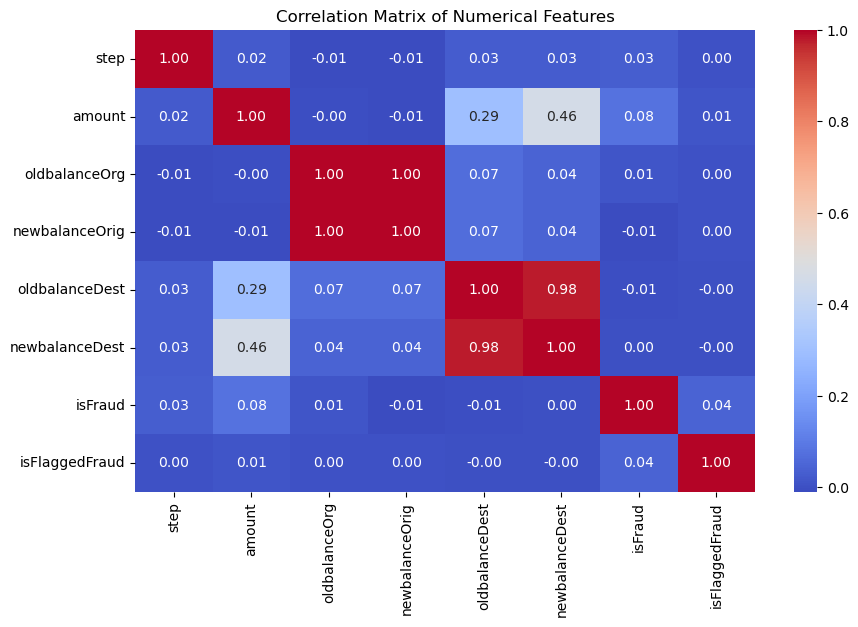

In [13]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

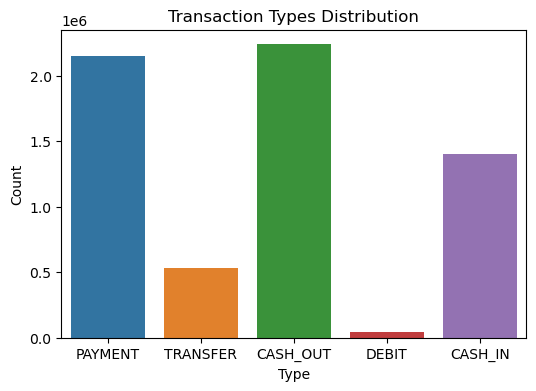

In [14]:
# Visualize the distribution of transaction types
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df)
plt.title("Transaction Types Distribution")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


DATA ANALYSIS

In [15]:
#PAYMENT

dfFraudPayment = df.loc[(df.isFraud == 1) & (df.type == 'PAYMENT')]
dfTotalPayment = df.loc[(df.type == 'PAYMENT')]

print("Number of fraudulent PAYMENTs = ", len(dfFraudPayment))
print("Number of non-fraudulent PAYMENTs = ", len(df.loc[(df.isFraud == 0) & (df.type == 'PAYMENT')]))
print("Fraud percentage: ", round(((len(dfFraudPayment) / len(dfTotalPayment)) * 100), 3), "%")

Number of fraudulent PAYMENTs =  0
Number of non-fraudulent PAYMENTs =  2151495
Fraud percentage:  0.0 %


In [16]:
#TRANSFER

# Filter for fraudulent TRANSFER transactions
dfFraudTransfer = df[(df['isFraud'] == 1) & (df['type'] == 'TRANSFER')]

# Filter for all TRANSFER transactions
dfTotalTransfer = df[df['type'] == 'TRANSFER']

# Filter for non-fraudulent TRANSFER transactions
dfNonFraudTransfer = df[(df['isFraud'] == 0) & (df['type'] == 'TRANSFER')]

# Print the number of fraudulent and non-fraudulent TRANSFER transactions
print("Number of fraudulent TRANSFERs =", len(dfFraudTransfer))
print("Number of non-fraudulent TRANSFERs =", len(dfNonFraudTransfer))

# Calculate and print the fraud percentage in TRANSFER transactions
fraud_percentage = round((len(dfFraudTransfer) / len(dfTotalTransfer)) * 100, 3)
print("Fraud percentage among TRANSFERs =", fraud_percentage, "%")


Number of fraudulent TRANSFERs = 4097
Number of non-fraudulent TRANSFERs = 528812
Fraud percentage among TRANSFERs = 0.769 %


In [17]:
#CASH OUT

# Filter for fraudulent CASH_OUT transactions
dfFraudCashOut = df[(df['isFraud'] == 1) & (df['type'] == 'CASH_OUT')]

# Filter for all CASH_OUT transactions
dfTotalCashOut = df[df['type'] == 'CASH_OUT']

# Filter for non-fraudulent CASH_OUT transactions
dfNonFraudCashOut = df[(df['isFraud'] == 0) & (df['type'] == 'CASH_OUT')]

# Print the number of fraudulent and non-fraudulent CASH_OUT transactions
print("Number of fraudulent CASH_OUTs =", len(dfFraudCashOut))
print("Number of non-fraudulent CASH_OUTs =", len(dfNonFraudCashOut))

# Calculate and print the fraud percentage in CASH_OUT transactions
fraud_percentage = round((len(dfFraudCashOut) / len(dfTotalCashOut)) * 100, 3)
print("Fraud percentage among CASH_OUTs =", fraud_percentage, "%")


Number of fraudulent CASH_OUTs = 4116
Number of non-fraudulent CASH_OUTs = 2233384
Fraud percentage among CASH_OUTs = 0.184 %


In [18]:
#DEBIT

# Filter for fraudulent DEBIT transactions
dfFraudDebit = df[(df['isFraud'] == 1) & (df['type'] == 'DEBIT')]

# Filter for all DEBIT transactions
dfTotalDebit = df[df['type'] == 'DEBIT']

# Filter for non-fraudulent DEBIT transactions
dfNonFraudDebit = df[(df['isFraud'] == 0) & (df['type'] == 'DEBIT')]

# Print the number of fraudulent and non-fraudulent DEBIT transactions
print("Number of fraudulent DEBITs =", len(dfFraudDebit))
print("Number of non-fraudulent DEBITs =", len(dfNonFraudDebit))

# Calculate and print the fraud percentage in DEBIT transactions
fraud_percentage = round((len(dfFraudDebit) / len(dfTotalDebit)) * 100, 3)
print("Fraud percentage among DEBITs =", fraud_percentage, "%")


Number of fraudulent DEBITs = 0
Number of non-fraudulent DEBITs = 41432
Fraud percentage among DEBITs = 0.0 %


In [19]:
#CASH IN

# Filter for fraudulent CASH_IN transactions
dfFraudCashIn = df[(df['isFraud'] == 1) & (df['type'] == 'CASH_IN')]

# Filter for all CASH_IN transactions
dfTotalCashIn = df[df['type'] == 'CASH_IN']

# Filter for non-fraudulent CASH_IN transactions
dfNonFraudCashIn = df[(df['isFraud'] == 0) & (df['type'] == 'CASH_IN')]

# Print the number of fraudulent and non-fraudulent CASH_IN transactions
print("Number of fraudulent CASH_INs =", len(dfFraudCashIn))
print("Number of non-fraudulent CASH_INs =", len(dfNonFraudCashIn))

# Calculate and print the fraud percentage in CASH_IN transactions
fraud_percentage = round((len(dfFraudCashIn) / len(dfTotalCashIn)) * 100, 3)
print("Fraud percentage among CASH_INs =", fraud_percentage, "%")


Number of fraudulent CASH_INs = 0
Number of non-fraudulent CASH_INs = 1399284
Fraud percentage among CASH_INs = 0.0 %


Total fraud transactions: 0.13%


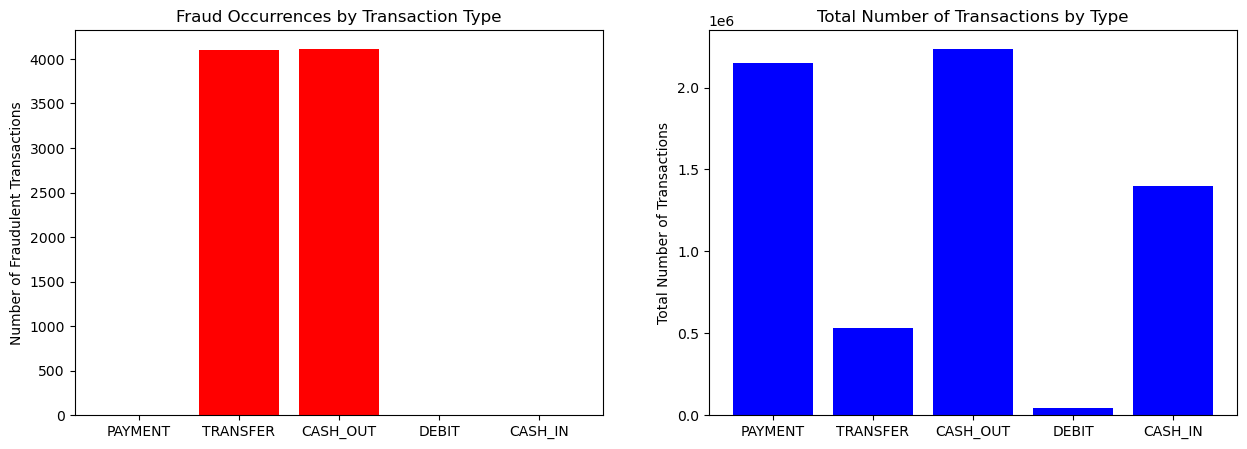

In [20]:
#RESULT

# Calculate percentage of fraudulent transactions in the entire dataset
fraudTransPercentage = (len(df[df['isFraud'] == 1]) / df.shape[0]) * 100
print("Total fraud transactions: {}%".format(round(fraudTransPercentage, 2)))

# Store the total and fraudulent transaction counts for different transaction types
total_transactions = [
    len(dfTotalPayment), len(dfTotalTransfer), len(dfTotalCashOut), 
    len(dfTotalDebit), len(dfTotalCashIn)
]
fraud_transactions = [
    len(dfFraudPayment), len(dfFraudTransfer), len(dfFraudCashOut), 
    len(dfFraudDebit), len(dfFraudCashIn)
]
transaction_types = ["PAYMENT", "TRANSFER", "CASH_OUT", "DEBIT", "CASH_IN"]

# Plot the fraud occurrences and total number of transactions side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot for fraud occurrences
axs[0].bar(transaction_types, fraud_transactions, color='red')
axs[0].set_title("Fraud Occurrences by Transaction Type")
axs[0].set_ylabel("Number of Fraudulent Transactions")

# Bar plot for total transactions
axs[1].bar(transaction_types, total_transactions, color='blue')
axs[1].set_title("Total Number of Transactions by Type")
axs[1].set_ylabel("Total Number of Transactions")

# Display the plots
plt.show()


In [21]:
# Filter the dataset for transactions flagged as fraud
flagged_transactions = df[df['isFlaggedFraud'] == 1]

# Print the number of transactions flagged as fraud
print(f"Number of transactions with isFlaggedFraud set to 1: {len(flagged_transactions)}\n\n")

# Display the filtered transactions
flagged_transactions


Number of transactions with isFlaggedFraud set to 1: 16




,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In the table, the columns `oldbalanceDest` and `newbalanceDest` both show `0.00`. This likely happens because the transaction stops when it reaches a certain limit. However, even if the `isFlaggedFraud` flag is set to `0`, there can still be `TRANSFER` transactions where both `oldbalanceDest` and `newbalanceDest` are `0.00`.

In [22]:
# Filter for TRANSFER transactions where isFlaggedFraud is 0 and both oldbalanceDest and newbalanceDest are 0
transfer_mask = (dfTotalTransfer['isFlaggedFraud'] == 0) & \
                (dfTotalTransfer['oldbalanceDest'] == 0) & \
                (dfTotalTransfer['newbalanceDest'] == 0)

# Apply the mask to get the filtered DataFrame
filtered_transfers = dfTotalTransfer[transfer_mask]

# Print the number of such transactions
number_of_transfers = len(filtered_transfers)
print(f'\nNumber of TRANSFERs where isFlaggedFraud = 0, oldbalanceDest = 0, and newbalanceDest = 0: \n{number_of_transfers}')



Number of TRANSFERs where isFlaggedFraud = 0, oldbalanceDest = 0, and newbalanceDest = 0: 
4158


DATA CLEANING

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [24]:
#imputing missing values in the numerical columns using median imputation
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

In [25]:
# For categorical columns, using mode imputation
cat_cols = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])


In [26]:
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


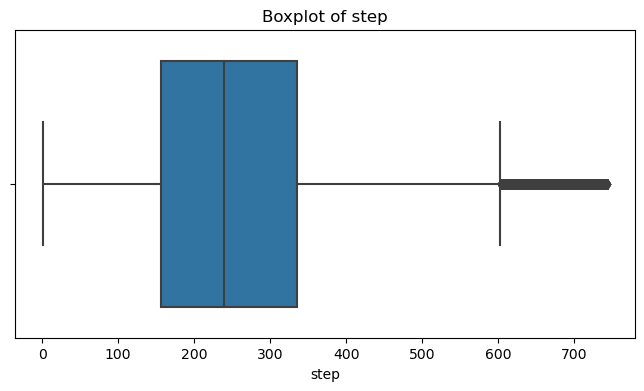

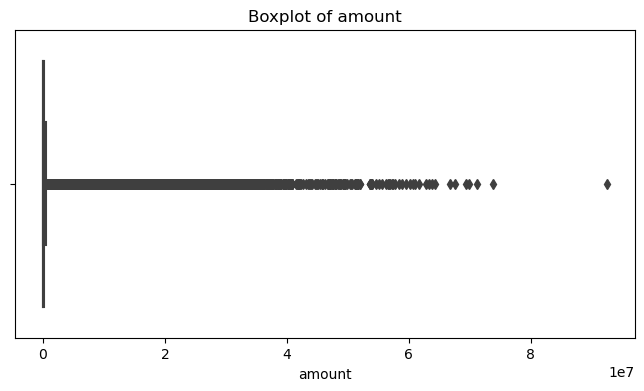

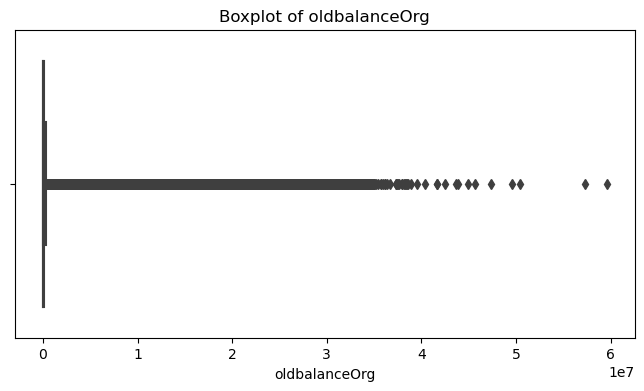

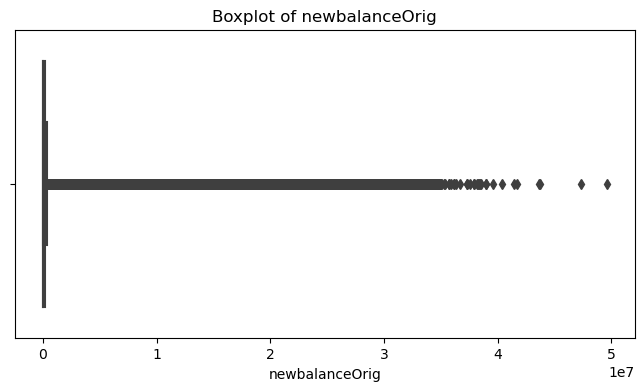

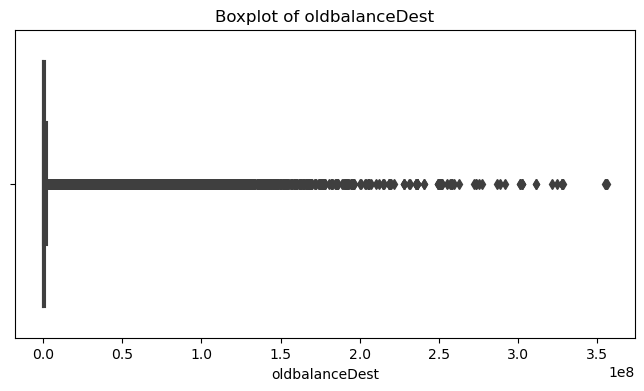

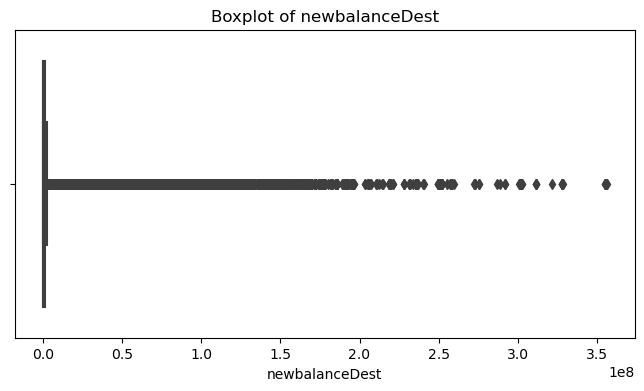

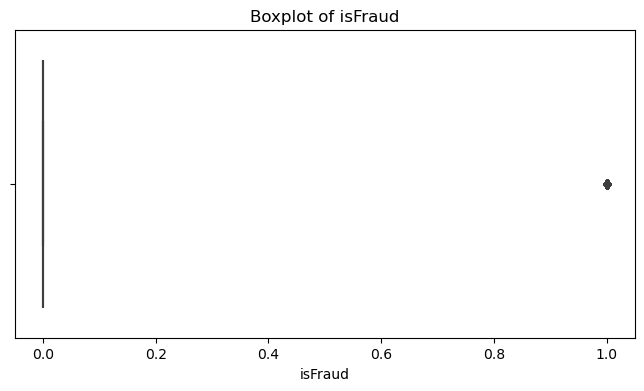

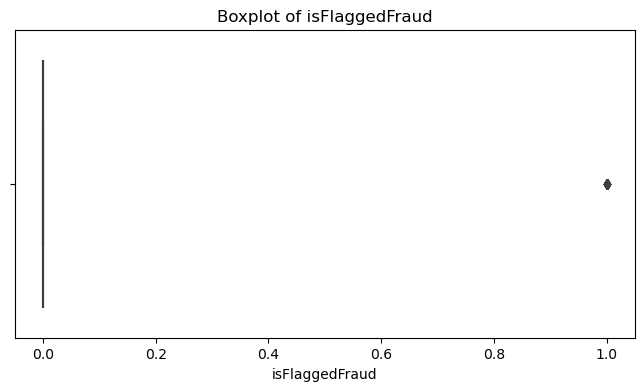

In [27]:
# Visualizing potential outliers using boxplots
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [44]:
# 1. Remove duplicates (if any)
df.drop_duplicates(inplace=True)

# 2. Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# 3. Handle outliers for numerical columns using the IQR method
# Define columns that could have outliers (e.g., 'amount')
numeric_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to remove outliers
df = remove_outliers(df, numeric_columns)

# 4. Convert any necessary columns to the correct data type (if required)
# For example, if 'step' column should be integer
df['step'] = df['step'].astype(int)

# Check the final state of the dataset
print("Data after cleaning:\n", df.info())


Missing values per column:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3251409 entries, 1 to 6362611
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int32  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int32(1), object(3)
memory usage: 285.3+ MB
Data after cleaning:
 None


In [45]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6362605,742,CASH_OUT,54652.46,C43545501,54652.46,0.00,C830041824,0.00,54652.46,1.0,0.0
6362608,742,TRANSFER,258355.42,C1226129332,258355.42,0.00,C1744173808,0.00,0.00,1.0,0.0
6362609,742,CASH_OUT,258355.42,C1113162093,258355.42,0.00,C797688696,25176.67,283532.09,1.0,0.0
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.00,C1812552860,0.00,0.00,1.0,0.0


FEATURE SELECTION

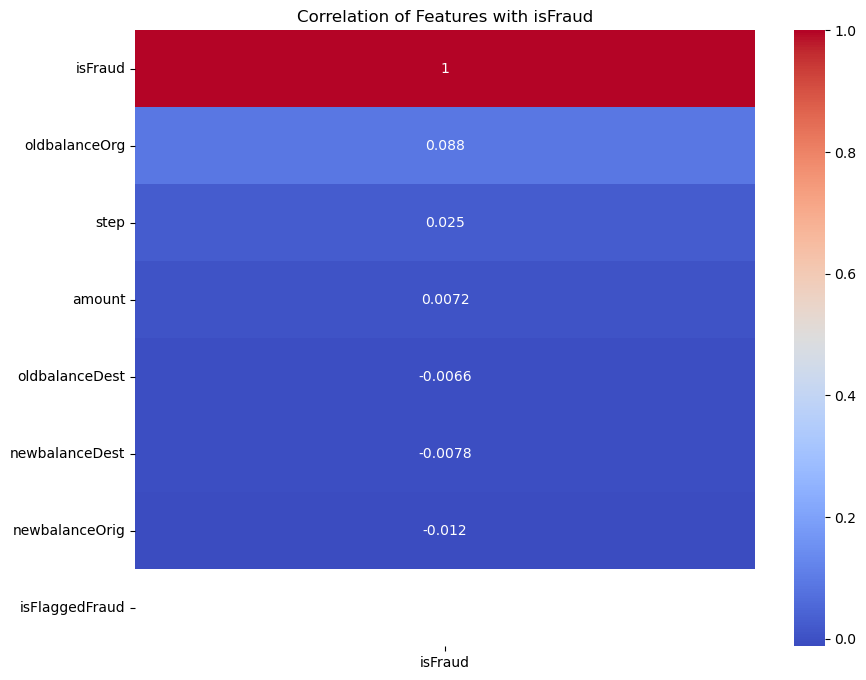

Features selected based on correlation:  ['isFraud']


In [47]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation with the target variable 'isFraud'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['isFraud']].sort_values(by='isFraud', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with isFraud')
plt.show()

# Select features with high correlation with 'isFraud' (based on a threshold, e.g., correlation > 0.1)
correlated_features = correlation_matrix.index[abs(correlation_matrix['isFraud']) > 0.1].tolist()
print("Features selected based on correlation: ", correlated_features)


In [49]:
from sklearn.feature_selection import VarianceThreshold

# Step 1: One-hot encode categorical features (like 'type')
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)

# Step 2: Drop non-numeric columns that are not useful (like 'nameOrig', 'nameDest')
df_encoded = df_encoded.drop(columns=['nameOrig', 'nameDest'])

# Step 3: Apply VarianceThreshold to remove low variance features
selector = VarianceThreshold(threshold=0.01)  # Threshold can be adjusted
df_high_variance = selector.fit_transform(df_encoded.drop(columns=['isFraud']))

# Step 4: Get the names of the selected features
selected_features = df_encoded.drop(columns=['isFraud']).columns[selector.get_support()]
print("Features selected based on variance threshold: ", selected_features)

# Output the shape of the dataset after applying the variance threshold
print("Shape of dataset after variance threshold:", df_high_variance.shape)


Features selected based on variance threshold:  Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'type_CASH_OUT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')
Shape of dataset after variance threshold: (3251409, 9)


In [54]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: One-hot encode categorical features (like 'type')
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)

# Step 2: Drop irrelevant columns (like 'nameOrig', 'nameDest')
df_encoded = df_encoded.drop(columns=['nameOrig', 'nameDest'])

# Step 3: Define the model
rf_model = RandomForestClassifier(random_state=42)

# Step 4: Fit the model
rf_model.fit(df_encoded.drop(columns=['isFraud']), df_encoded['isFraud'])

# Step 5: Get feature importance
feature_importances = pd.DataFrame(rf_model.feature_importances_, 
                                   index=df_encoded.drop(columns=['isFraud']).columns, 
                                   columns=['importance']).sort_values(by='importance', ascending=False)

# Step 6: Display the top features
print("Feature Importance using Random Forest:\n", feature_importances)

# Step 7: Select top features (based on importance threshold > 0.05)
important_features = feature_importances[feature_importances['importance'] > 0.05].index.tolist()
print("Top features selected based on Random Forest importance: ", important_features)


Feature Importance using Random Forest:
                 importance
newbalanceDest    0.353091
oldbalanceOrg     0.166557
amount            0.159124
step              0.121989
oldbalanceDest    0.105192
type_TRANSFER     0.046969
newbalanceOrig    0.025765
type_CASH_OUT     0.015388
type_PAYMENT      0.005549
type_DEBIT        0.000376
isFlaggedFraud    0.000000
Top features selected based on Random Forest importance:  ['newbalanceDest', 'oldbalanceOrg', 'amount', 'step', 'oldbalanceDest']


In [56]:
from sklearn.feature_selection import mutual_info_classif

# Step 1: One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)

# Step 2: Drop irrelevant columns like 'nameOrig' and 'nameDest'
df_encoded = df_encoded.drop(columns=['nameOrig', 'nameDest'])

# Step 3: Calculate mutual information
mutual_info = mutual_info_classif(df_encoded.drop(columns=['isFraud']), df_encoded['isFraud'])

# Step 4: Create a DataFrame to visualize the importance
mutual_info_df = pd.DataFrame(mutual_info, index=df_encoded.drop(columns=['isFraud']).columns, columns=['mutual_info']).sort_values(by='mutual_info', ascending=False)

# Step 5: Display the mutual information for each feature
print("Mutual Information Scores:\n", mutual_info_df)

# Step 6: Select top features based on a threshold
mutual_info_selected_features = mutual_info_df[mutual_info_df['mutual_info'] > 0.01].index.tolist()
print("Top features selected based on mutual information: ", mutual_info_selected_features)


Mutual Information Scores:
                 mutual_info
type_PAYMENT       0.134899
type_CASH_OUT      0.105722
step               0.006446
type_TRANSFER      0.002688
oldbalanceOrg      0.002345
amount             0.001029
newbalanceOrig     0.000245
newbalanceDest     0.000083
type_DEBIT         0.000063
oldbalanceDest     0.000061
isFlaggedFraud     0.000002
Top features selected based on mutual information:  ['type_PAYMENT', 'type_CASH_OUT']


 DATA SPLITTING

In [57]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop(columns=['isFraud'])
y = df_encoded['isFraud']

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (2601127, 11)
Testing set size: (650282, 11)


MODELLING

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    649677
         1.0       0.91      0.42      0.58       605

    accuracy                           1.00    650282
   macro avg       0.96      0.71      0.79    650282
weighted avg       1.00      1.00      1.00    650282



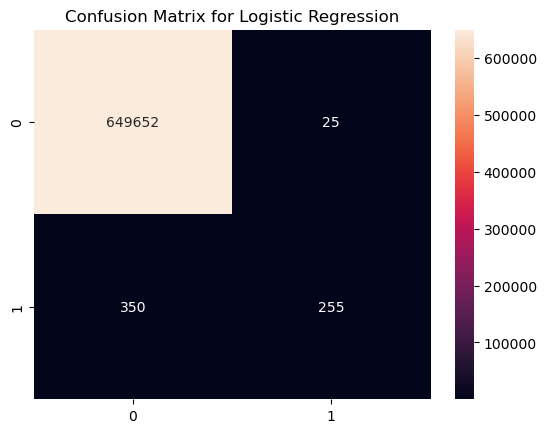

ROC-AUC Score for Logistic Regression: 0.997375652035709


In [58]:
#LOGISTIC REGRESSION MODEL

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model
logreg.fit(X_train, y_train)

# Predict on test data
y_pred_logreg = logreg.predict(X_test)

# Evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# ROC-AUC Score
roc_auc_logreg = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score for Logistic Regression: {roc_auc_logreg}")


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    649677
         1.0       0.97      0.61      0.75       605

    accuracy                           1.00    650282
   macro avg       0.98      0.80      0.87    650282
weighted avg       1.00      1.00      1.00    650282



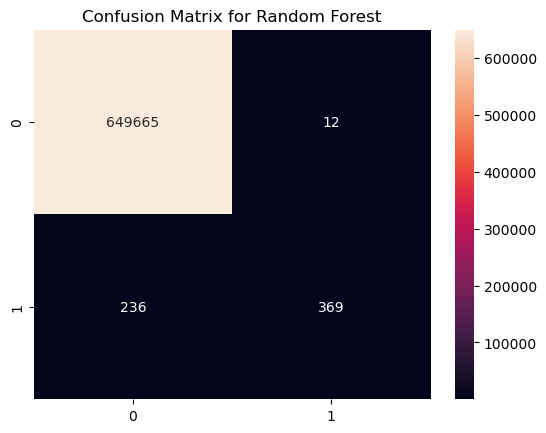

ROC-AUC Score for Random Forest: 0.9888046630978748


In [60]:
#RANDOM FOREST MODEL

from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d')
plt.title("Confusion Matrix for Random Forest")
plt.show()

# ROC-AUC Score
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score for Random Forest: {roc_auc_rf}")


XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    649677
         1.0       0.93      0.72      0.81       605

    accuracy                           1.00    650282
   macro avg       0.97      0.86      0.91    650282
weighted avg       1.00      1.00      1.00    650282



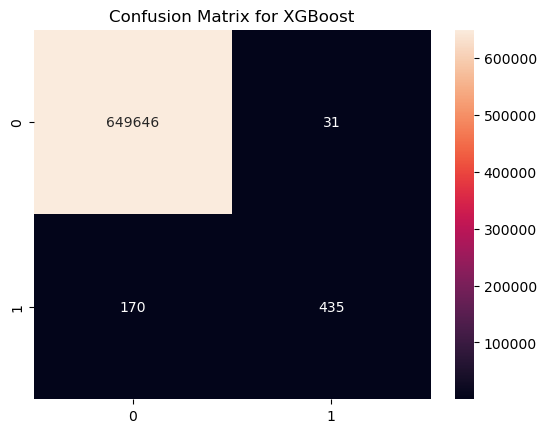

ROC-AUC Score for XGBoost: 0.9997717416271839


In [61]:
#XGBoost Model

from xgboost import XGBClassifier

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d')
plt.title("Confusion Matrix for XGBoost")
plt.show()

# ROC-AUC Score
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score for XGBoost: {roc_auc_xgb}")


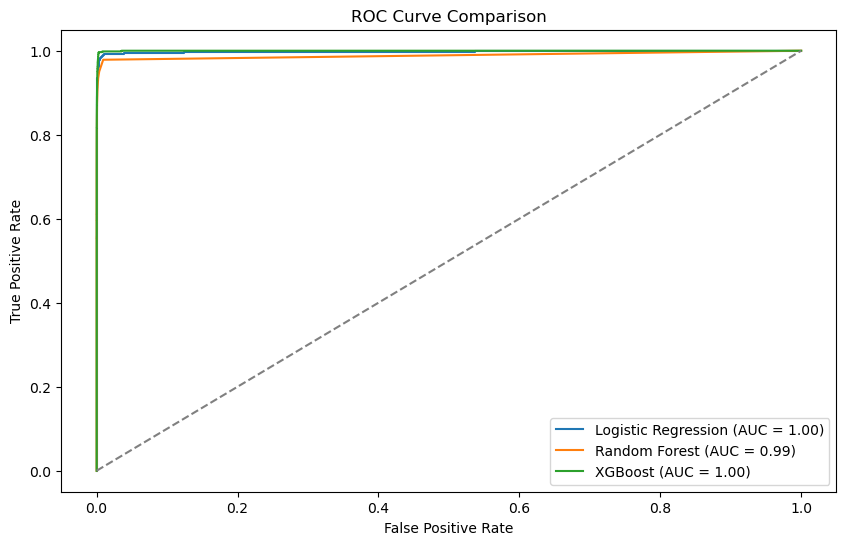

In [62]:
#Model Comparison
# Visualize ROC-AUC comparison
from sklearn.metrics import roc_curve

# Calculate ROC curves
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Plot settings
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

# Define the hyperparameters to tune for Random Forest
rf_params = {
    'n_estimators': [100, 200],  # Reduced grid size for faster execution
    'max_depth': [10, 20],       # Limiting to a smaller range
    'min_samples_split': [5, 10],  # Fewer options for splitting
    'min_samples_leaf': [1, 2]   # Fewer options for leaf nodes
}

# Initialize Random Forest and GridSearchCV with reduced parallelism (n_jobs=1)
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42, n_jobs=1), 
                              param_grid=rf_params, 
                              cv=3, n_jobs=1, verbose=2, scoring='roc_auc')

# Fit the GridSearch model
rf_grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Random Forest Parameters: {rf_grid_search.best_params_}")
print(f"Best Random Forest ROC-AUC: {rf_grid_search.best_score_}")

# Define hyperparameters for XGBoost
xgb_params = {
    'n_estimators': [100, 200],  # Reduced grid size
    'learning_rate': [0.01, 0.1],  # Adjusted range for learning rate
    'max_depth': [3, 5],  # Limiting the depth options
    'subsample': [0.8, 1]  # Typical range for subsampling
}

# Initialize XGBoost and RandomizedSearchCV with reduced parallelism (n_jobs=1)
xgb_random_search = RandomizedSearchCV(estimator=XGBClassifier(random_state=42, n_jobs=1), 
                                       param_distributions=xgb_params, 
                                       n_iter=10, cv=3, n_jobs=1, verbose=2, scoring='roc_auc')

# Fit the RandomizedSearch model
xgb_random_search.fit(X_train, y_train)  

# Best parameters and score for XGBoost
print(f"Best XGBoost Parameters: {xgb_random_search.best_params_}")
print(f"Best XGBoost ROC-AUC: {xgb_random_search.best_score_}") 


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 4.1min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 4.2min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 3.8min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 7.7min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 7.6min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 7.4min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 3.6min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 3.6min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 3.6min
[CV] END max_depth=10, min_

In [73]:
# Initialize Logistic Regression with regularization
logreg_l2 = LogisticRegression(penalty='l2', C=0.1, solver='liblinear')
logreg_l2.fit(X_train, y_train)

# Evaluate
y_pred_l2 = logreg_l2.predict(X_test)
print("L2 Regularized Logistic Regression Report:")
print(classification_report(y_test, y_pred_l2))

# L1 regularization
logreg_l1 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
logreg_l1.fit(X_train, y_train)

# Evaluate
y_pred_l1 = logreg_l1.predict(X_test)
print("L1 Regularized Logistic Regression Report:")
print(classification_report(y_test, y_pred_l1))


L2 Regularized Logistic Regression Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    649677
         1.0       0.66      0.44      0.53       605

    accuracy                           1.00    650282
   macro avg       0.83      0.72      0.76    650282
weighted avg       1.00      1.00      1.00    650282



C:\Users\RACY\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


L1 Regularized Logistic Regression Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    649677
         1.0       0.91      0.52      0.66       605

    accuracy                           1.00    650282
   macro avg       0.96      0.76      0.83    650282
weighted avg       1.00      1.00      1.00    650282



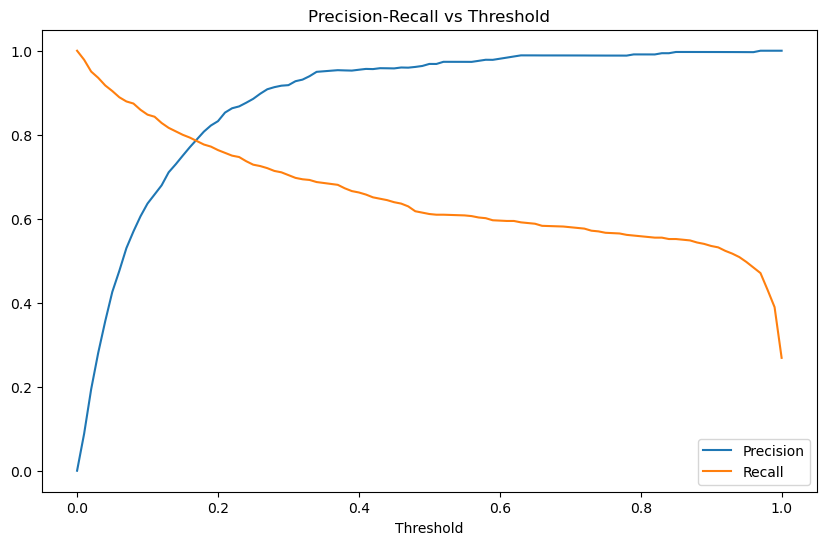

In [75]:
from sklearn.metrics import precision_recall_curve

# Get precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

# Plot precision-recall vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.show()
